In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("IMDB_cleaned_train.csv")
X = df["cleaned_review"]
y = df["sentiment"].map({"pos":1, "neg":0})

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

model = LogisticRegression(max_iter=500)
model.fit(X_tfidf, y)

sample_reviews = ["this movie was great", "boring film never watch again"]
sample_features = tfidf.transform(sample_reviews)
preds = model.predict(sample_features)

for review, pred in zip(sample_reviews, preds):
    print(f"Review: {review}\nPredicted: {'positive' if pred==1 else 'negative'}\n")


Review: this movie was great
Predicted: positive

Review: boring film never watch again
Predicted: negative



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

df = pd.read_csv("IMDB_cleaned_train.csv")  
X = df["cleaned_review"]
y = df["sentiment"].map({"pos": 1, "neg": 0})  

print("Dataset loaded. Shape:", df.shape)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


tfidf = TfidfVectorizer(max_features=5000)  # smaller feature set for faster training
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF vectorization completed. Shape:", X_train_tfidf.shape)


# Define Models

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42)  # fewer trees for speed
}

results = []


#  Train & Evaluate

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])

    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["negative", "positive"]))


results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\n=== Model Comparison ===")
print(results_df)

sample_reviews = [
    "this movie was absolutely fantastic i loved it",
    "worst film ever boring and waste of time",
    "average story but the acting was good"
]
sample_tfidf = tfidf.transform(sample_reviews)

preds = models["Logistic Regression"].predict(sample_tfidf)
for review, pred in zip(sample_reviews, preds):
    print(f"\nReview: {review}\nPredicted Sentiment: {'positive' if pred==1 else 'negative'}")



Dataset loaded. Shape: (10000, 3)
TF-IDF vectorization completed. Shape: (8000, 5000)

Training Logistic Regression...
Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.84      0.86       992
    positive       0.85      0.89      0.87      1008

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000


Training Decision Tree...
Decision Tree Classification Report:
              precision    recall  f1-score   support

    negative       0.69      0.73      0.71       992
    positive       0.72      0.67      0.69      1008

    accuracy                           0.70      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.70      0.70      0.70      2000


Training Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

 

### Linear models (Logistic Regression) work very well with TF-IDF features for sentiment analysis.

### Ensemble methods (Random Forest) are slightly slower but still strong; good if dataset is more complex.

### Decision Trees alone are not ideal due to overfitting.

### TF-IDF vectorization captures the essential word patterns without additional embeddings, sufficient for a 10k dataset.

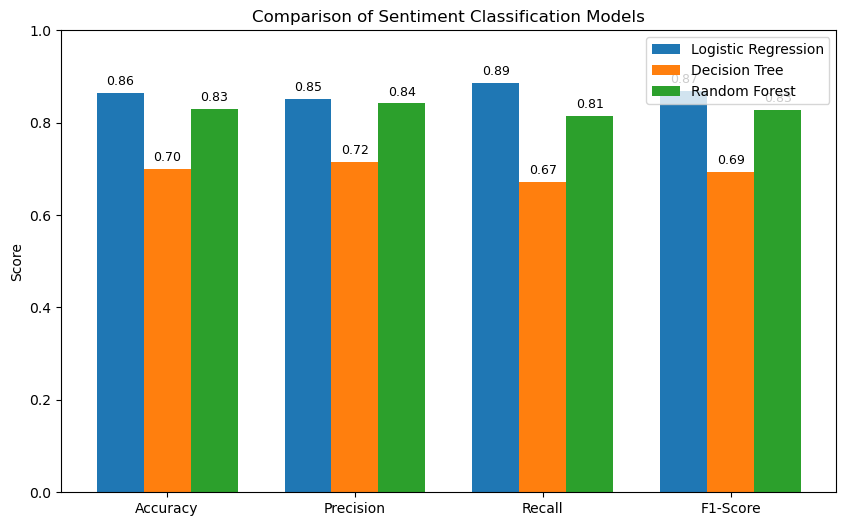

In [4]:
import matplotlib.pyplot as plt
import numpy as np


metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
models_list = results_df["Model"].tolist()
values = results_df[metrics].values  # shape: (3 models x 4 metrics)


x = np.arange(len(metrics))  # label locations
width = 0.25  # width of each bar

fig, ax = plt.subplots(figsize=(10,6))

for i, model in enumerate(models_list):
    ax.bar(x + i*width, values[i], width, label=model)


ax.set_ylabel("Score")
ax.set_ylim(0, 1)
ax.set_title("Comparison of Sentiment Classification Models")
ax.set_xticks(x + width)  # center tick labels
ax.set_xticklabels(metrics)
ax.legend()

for i in range(len(models_list)):
    for j in range(len(metrics)):
        ax.text(x[j] + i*width, values[i][j] + 0.01, f"{values[i][j]:.2f}", ha='center', va='bottom', fontsize=9)

plt.show()
